# Why AI Can't Teach Well
## In the Pursuit of More Optimal Ways to Explain Things

---

### I) Introduction
This cell presents an example of an AI explanation of **FFT (Fast Fourier Transform)**.  

> These results are generated using **the free version of ChatGPT (gpt-5o-mini)**.

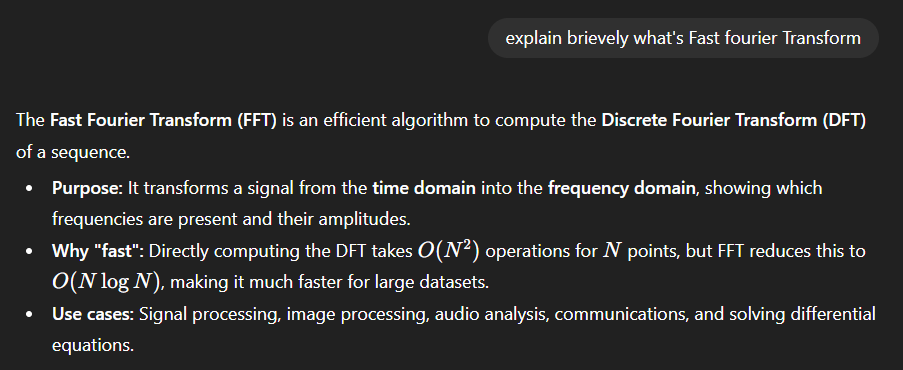

From the screenshot, it is evident that AI explanations can sometimes be suboptimal. Observed issues include:

- Use of terms like $O(N)$ `complexity` without clarifying if the user understands **Big-O notation**.
- Explanations are often **unintuitive** and **not concise** for a brief explanation.
- The explanation begins with a **definition** rather than a **problem-oriented approach**.
- Lacks **interactivity** that could engage the learner more effectively.

**Question:**  
If AI had the capability to provide **animated, problem-based explanations**, would the learning experience improve?

---

### II) Premise
The premise of this project is to **analyze and collect data for eventual AI training**.  

- The dataset focuses on content from **popular YouTube channels and websites** that specialize in explaining **complex topics**.
- These sources have established **reputation and high engagement**, providing a model for effective teaching strategies.
- The goal is to analyze **language use, phrasing, and problem framing** to inform **future AI fine-tuning**.
### III)Primal exploration
the code in `Scraping.py` generates a csv file with the current date in the `DataSet` directory
we will analyse in this paragraph the Scraped urls
#### 1) Surface-level Examination

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv("DataSet/Scraped Videos/Scraped2025-11-15.csv")
print(df.dtypes)

video_id             object
title                object
channel              object
duration             object
duration_seconds    float64
views                 int64
likes                 int64
topics               object
url                  object
search_term          object
dtype: object


As you can see the head of the CSV contains the Above info,we will focus our analysis on the following things :
- Title
- channel
- duration
- views
- likes
- search_term

Our bases of comparison at this stage will be the **duration_seconds** ,the **title** and the **Views** and our Target is visualizing the **likes**
> the likes at this stage is our **best indicator** bcz the **"True" engagement** info is relatively **low and exclusive**

##### let's start by the easiest "the **Duration_seconds** and the **Views**"

C:\Users\mohan\AppData\Local\Temp\ipykernel_17780\3485866643.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\mohan\AppData\Local\Temp\ipykernel_17780\3485866643.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\mohan\AppData\Local\Temp\ipykernel_17780\34

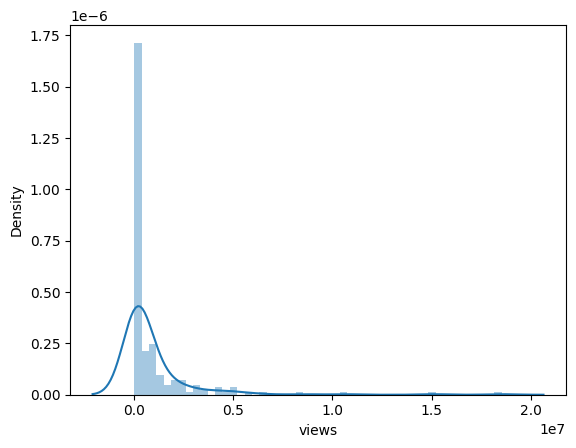

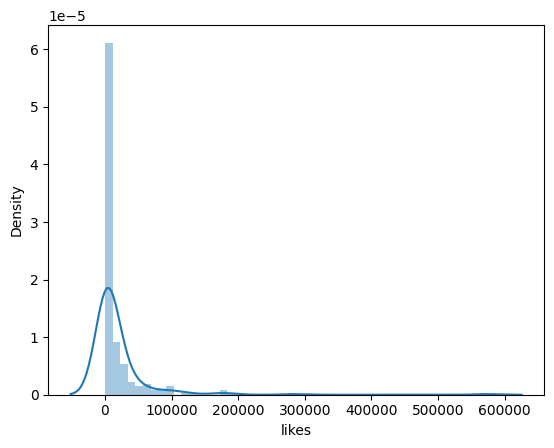

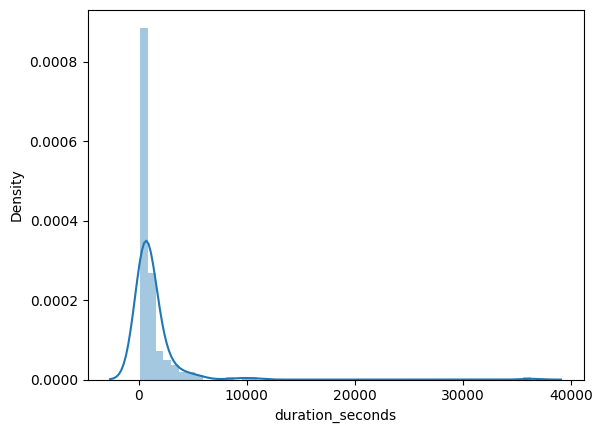

In [5]:
#Selecting the numerical columns
df_num=df.loc[:,["views","likes","duration_seconds"]]
#plotting the numerical columns in a histogram
for col in df_num.columns:
    plt.figure()
    sns.distplot(df[col])


As you can see by the initial visualisation the numbers don't seem centered in the middle. I think the reason is we're visualizing by $1e7$ unit
- an idea is to **visualize the Mean** with a line

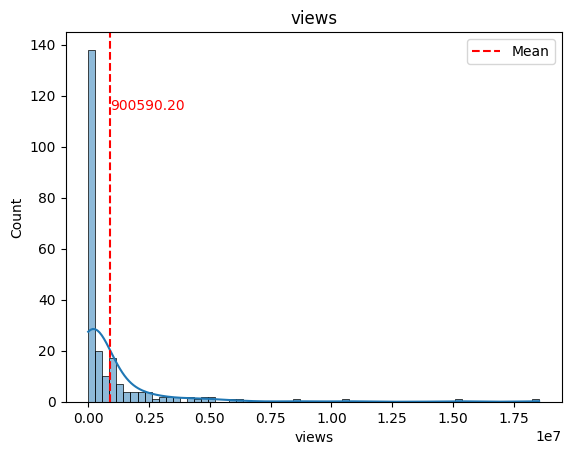

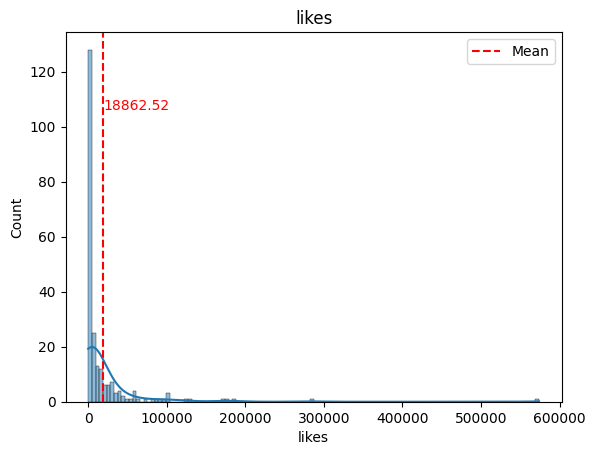

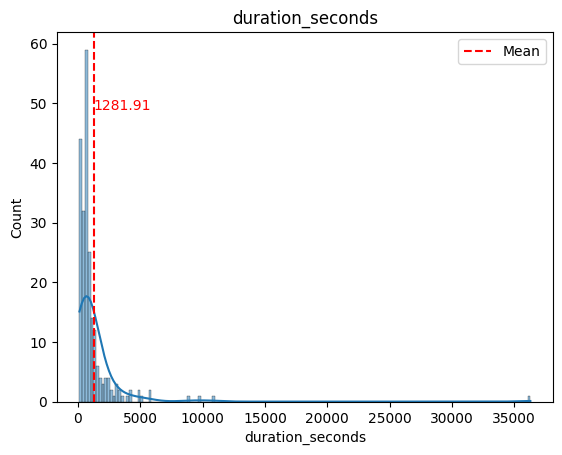

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df_num = df[["views", "likes", "duration_seconds"]]

for col in df_num.columns:
    plt.figure()
    sns.histplot(df_num[col], kde=True)
    mean_val=df_num[col].mean()
    plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
     # Add text label next to the vertical line
    plt.text(mean_val, plt.ylim()[1]*0.8, f"{mean_val:.2f}", 
             color='red', rotation=0, va='center')
    plt.legend()
    plt.title(col)


The Mean is **Left scewed** so the best way to more visualize it is by using the $log() \;Scale$

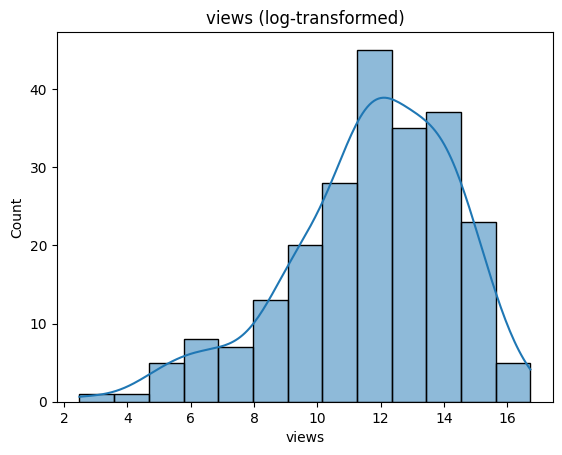

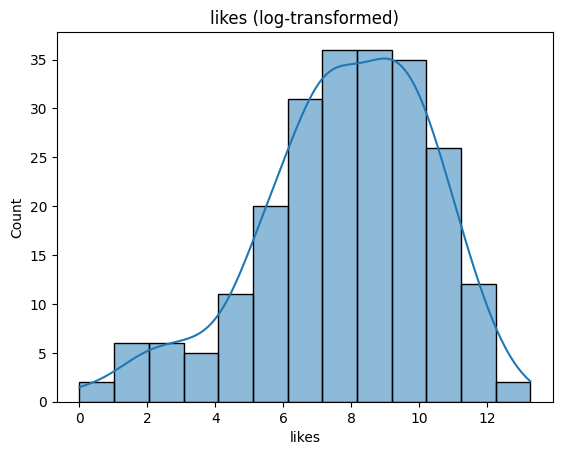

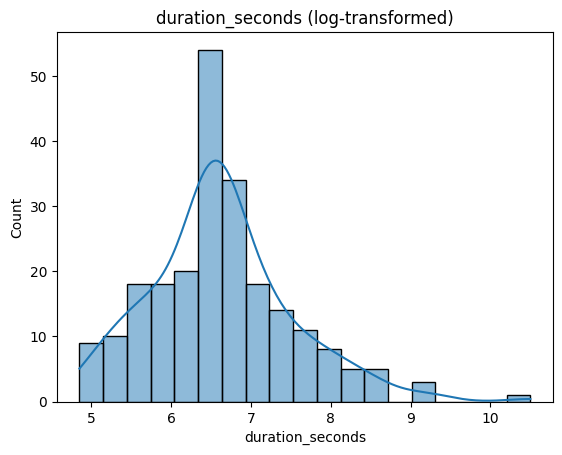

In [5]:
for col in df_num.columns:
    plt.figure()
    sns.histplot(df_num[col].apply(lambda x: np.log1p(x)), kde=True)
    plt.title(col + " (log-transformed)")

You can see now that the shapes of the functions are more like **Normal Distributions**. 
Now we will check for correlation between these differents parameters

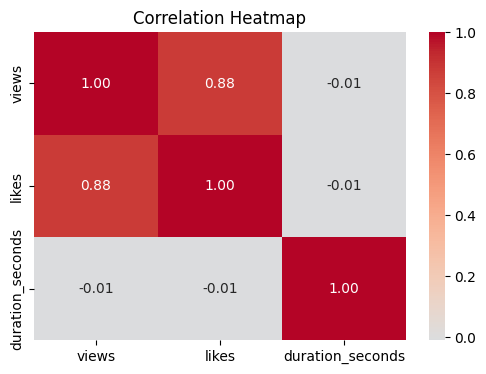

In [6]:
plt.figure(figsize=(6,4))
corr = df_num.corr()  # Compute correlation matrix

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

So from the Correlation Matrix There is no direct correlation between **duration_seconds** and the number of **views/likes** but this pair( **views an likes**) seem very correlated

##### Title Analysis
we will dive in this part in title analysis to do that we must tokenise it

In [7]:
import re

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove punctuation
    return text.split()

df["title_tokens"] = df["title"].apply(preprocess)

After tokenizing it to differents words we can see our title_tokens and do operations on them

In [32]:
####Removing stop words:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

df["title_tokens"] = df["title_tokens"].apply(
    lambda tokens: [w for w in tokens if w not in stop_words]
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
###Counting words
from collections import Counter

word_counts = Counter()

for tokens in df["title_tokens"]:
    word_counts.update(tokens)

word_counts_df = pd.DataFrame(word_counts.items(), columns=["word", "count"])
word_counts_df = word_counts_df.sort_values(by="count", ascending=False)
word_counts_df.head(20)


,word,count
199,complex,135
200,analysis,97
23,of,59
6,derivatives,56
9,calculus,44
24,the,38
31,in,31
103,and,30
15,explained,25
47,functions,22


As you can see the most used things are related to our theme (in this case complexe analysis and derivatives)
but there is outliers like **Explained,introduction,minutes**
these words seem to be the one attracting users to the videos

In [9]:
### analysing title tokens in function of views
from collections import defaultdict

word_views = defaultdict(list)

for i, row in df.iterrows():
    for word in row['title_tokens']:
        word_views[word].append(row['views'])

# Compute average views per word
avg_views_per_word = {word: sum(views)/len(views) for word, views in word_views.items()}

# Convert to DataFrame and sort
avg_views_df = pd.DataFrame(avg_views_per_word.items(), columns=['word', 'avg_views'])
avg_views_df = avg_views_df.sort_values(by='avg_views', ascending=False)
avg_views_df.head(20)

,word,avg_views
414,drawing,1.854372e+07
412,fourier,1.854372e+07
416,de4,1.854372e+07
415,circles,1.854372e+07
413,heat,1.854372e+07
467,map,1.512006e+07
263,but,9.554948e+06
345,flow,9.275553e+06
268,imaginary,8.478478e+06
269,real,8.478478e+06


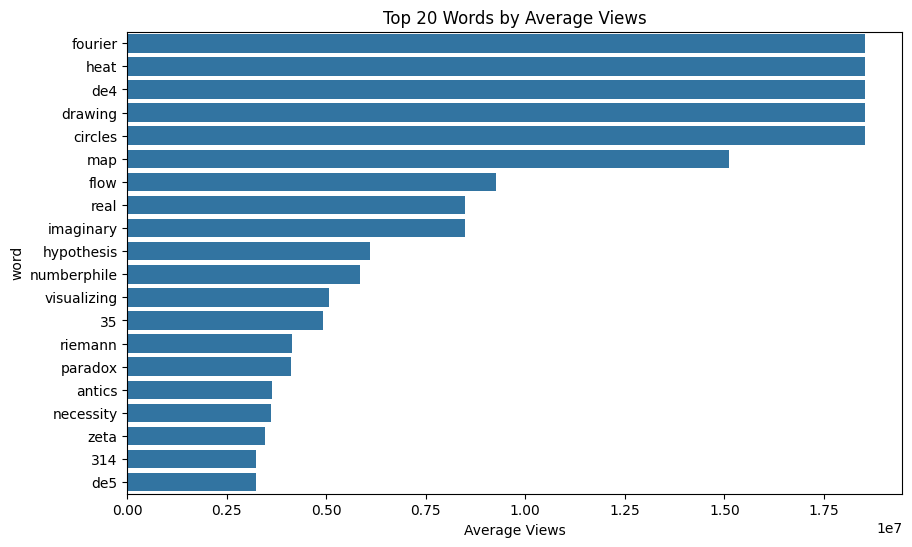

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

top_words = avg_views_df.head(20)

plt.figure(figsize=(10,6))
sns.barplot(x='avg_views', y='word', data=top_words)
plt.title("Top 20 Words by Average Views")
plt.xlabel("Average Views")
plt.show()


We can also see the top 20 videos views and liked and each title

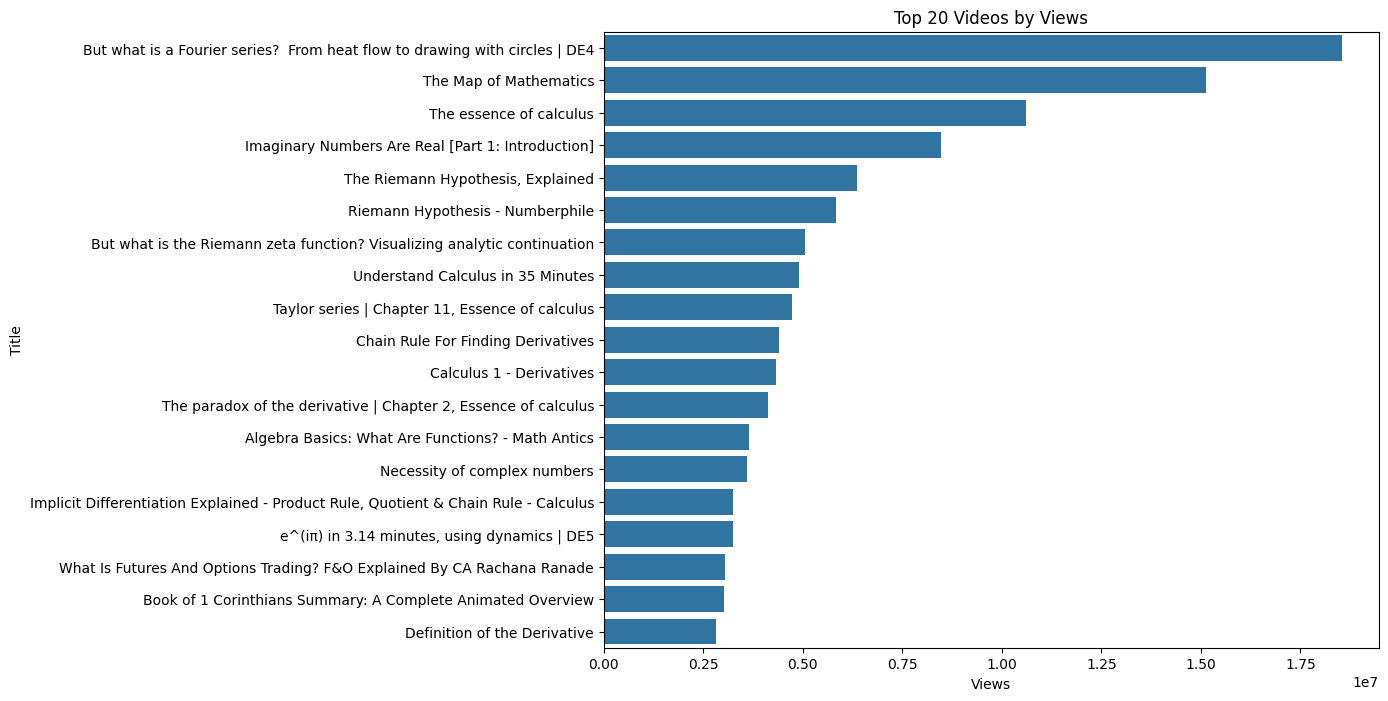

In [10]:
top_views = df.sort_values(by='views', ascending=False).head(20)
top_views[['title', 'views', 'likes']]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.barplot(x='views', y='title', data=top_views)
plt.title("Top 20 Videos by Views")
plt.xlabel("Views")
plt.ylabel("Title")
plt.show()


we can see that there are 2 bases of the views ( either the yt vid title is funny /comparative ) or the channel is popular (well known for it's deep analysis)

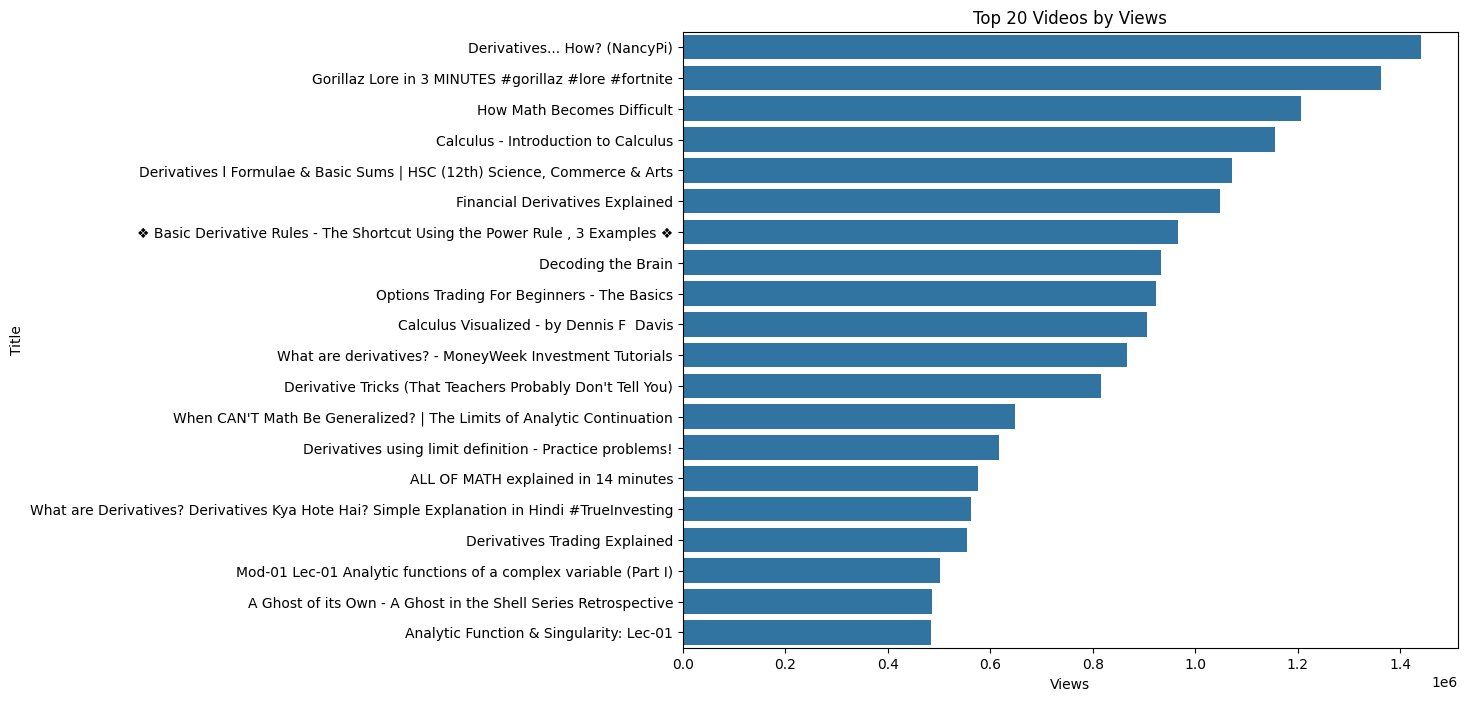

In [11]:
#seeing the titles where the channels are not in the top 20 viewed
# Top 20 channels by total views
top20_channels = df.groupby("channel")["views"].sum().sort_values(ascending=False).head(20).index

# Filter rows where the channel is NOT in the top 20 channels
filtered = df[~df["channel"].isin(top20_channels)]

# From those, take the top 20 most-viewed rows
top20_non_top_channels = filtered.sort_values(by="views", ascending=False).head(20)

plt.figure(figsize=(10,8))
sns.barplot(x='views', y='title', data=top20_non_top_channels)
plt.title("Top 20 Videos by Views")
plt.xlabel("Views")
plt.ylabel("Title")
plt.show()




By eliminated the factor of being in the top 20 channels the top viewed titles show some interesting observevation:
- the usage of **ALL ,Ghost,Singularity,shortcut,Financial,How (twice)**

Now let's analyse the transcripts themselves.
## Transcripts:
the transcripts are generated with `transcript.py` the result of which is going to be in `video_transcripts.csv`
> the transcripts aren't showing the full list of urls due to the facts that it takes so long to do

In [12]:
#joining the transcripts with the scraped video things
import pandas as pd
import glob
path = "./DataSet/Scraped Videos/"  

# list all CSV files in folder
all_csv_files = glob.glob(path + "*.csv")
print(all_csv_files)

# read and concatenate
df_2 = pd.concat((pd.read_csv(f) for f in all_csv_files), ignore_index=True)
transcripts=pd.read_csv("video_transcripts.csv")
videos=df_2[["url","title","views","likes"]]
df_merged = pd.merge(transcripts, videos,left_on="video_url", right_on="url", how="left")


['./DataSet/Scraped Videos\\AI_yt_vids_sorted.csv', './DataSet/Scraped Videos\\AI_yt_vids_sorted_2025-11-11.csv', './DataSet/Scraped Videos\\Linear_algebra_yt_vids.csv', './DataSet/Scraped Videos\\Scraped2025-11-15.csv']


In [26]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess
from nltk import ngrams

df_merged["transcript_token"] = (
    df_merged["transcript"].apply(preprocess)
    .apply(lambda tokens: [' '.join(bg) for bg in ngrams(tokens, 6)])
)

# Collect all views per word
# word_views = defaultdict(list)

# for _, row in df_merged.iterrows():
#     if isinstance(row["transcript_token"], list):
#         for word in row["transcript_token"]:
#             if pd.notna(row["views"]):
#                 word_views[word].append(row["views"])

# # Compute average views per word
# avg_views_per_word = {
#     word: sum(views) / len(views)
#     for word, views in word_views.items()
#     if len(views) > 3  # Optional: keep only words that appear enough times
# }

# # Convert to DataFrame and sort
# avg_views_df = pd.DataFrame(
#     avg_views_per_word.items(), columns=["word", "avg_views"]
# ).sort_values(by="avg_views", ascending=False)

# # Keep top 20
# top20 = avg_views_df.head(20)
# print(top20)



but the thing is checking by words is non sensical for this type of analysis we better go with phrases /expressions most communly used

In [27]:
from collections import Counter

word_counts = Counter()

for tokens in df_merged["transcript_token"]:
    word_counts.update(tokens)

word_counts_df = pd.DataFrame(word_counts.items(), columns=["word", "count"])
word_counts_df = word_counts_df.sort_values(by="count", ascending=False)
word_counts_df.head(20)

,word,count
7813,so this is going to be,211
179800,put a two in front of,194
151028,so lets say if you have,180
179799,to put a two in front,178
152684,now lets say if you have,174
179579,put a three in front of,162
151110,lets say if we have a,155
151109,so lets say if we have,153
179823,so we need to put a,148
170960,you need to be able to,147
